#### Imports

In [17]:
import numpy as np
from __future__ import print_function
import pandas as pd

In [18]:
from ipywidgets import *
from ipywidgets import interact, RadioButtons, FloatSlider

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [21]:
import matplotlib
matplotlib.rcParams.update({
  "lines.linewidth": 2.0,
  #"examples.download": True,
  "axes.edgecolor": "#bcbcbc",
  "patch.linewidth": 0.5,
  "legend.fancybox": True,
  "axes.color_cycle": ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457", "#188487", "#E24A33"],
  "axes.facecolor": "#eeeeee",
  "axes.labelsize": "large",
  "axes.grid": True,
  "patch.edgecolor": "#eeeeee",
  "axes.titlesize": "x-large",
  "svg.embed_char_paths": "path",
  "examples.directory": ""
})

**Note**: This tutorial is tested under this version of Scikits-learn

In [22]:
clean_records = [('Mercury',0.39, 0.24), ('Venus', 0.72, 0.61), ('Earth', 1.00, 1.00), ('Mars',1.52, 1.88), 
           ('Jupiter',5.20, 11.86), ('Saturn', 9.54, 29.46)]

In [23]:
noisy_records = [('Mercury',0.39, 0.1611), ('Venus', 0.72, 0.5370), ('Earth', 1.00, 1.00), ('Mars',1.52, 2.45), 
           ('Jupiter',5.20, 9.727), ('Saturn', 9.54, 25.04)]

In [24]:
df = pd.DataFrame().from_records(noisy_records, columns=['Planet', 'R', 'TI'])

In [25]:
df.TI.values

array([  0.1611,   0.537 ,   1.    ,   2.45  ,   9.727 ,  25.04  ])

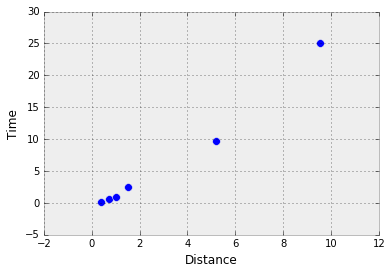

In [28]:
plt.scatter(df.R.values, df.TI.values, s=60)
plt.xlabel('Distance')
plt.ylabel('Time')

The feature array $X$ is a matrix where each row represents an example.

In [88]:
X1 = np.log(df.R.values)
y1 = np.log(df.TI.values)

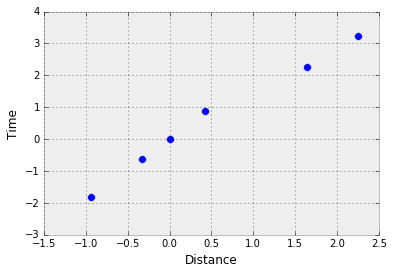

In [31]:
plt.scatter(X1, y1, s=60)
plt.xlabel('Distance')
plt.ylabel('Time')

In [75]:
#y1 = y1 + np.random.normal(loc=0.0, scale=0.25, size=6)

In [76]:
#y1[2] = 0.0

In [89]:
#np.exp(y1)

In [90]:
#plt.scatter(df.R.values, np.exp(y1), s=60)
#plt.xlabel('Distance')
#plt.ylabel('Time')

#### Data fitting

Try to change the `slope` and `bias` to reduce the residual sum of squares (error).
What is the smallest value you can produce?
Our goal in regression is to learn {`slope`, `bias`} that minimizes the error term.

Notice, that we are asumming that the data fits a line, that does not have to be true. Howeover, we would like to find the best solution under this assumption.

Slope = 1.5, Bias = 1.0
Residual sum of squares: 1.27


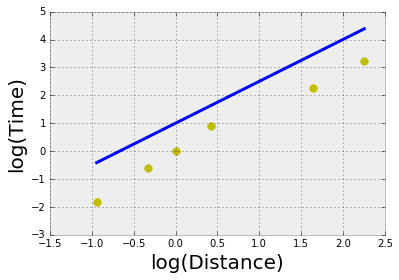

In [32]:
def plot_line(slope, bias):
  plt.scatter(X1, y1,  color='y', s =60)
  plt.xlabel("log(Distance)", fontsize=20); plt.ylabel("log(Time)", fontsize=20)
 # _ = plt.title("$y\,\,vs\,\,X_2$", fontsize=20)
  predictions = slope * X1 + bias
  plt.plot(X1, predictions, color='blue', linewidth=3)
  print("Slope = {}, Bias = {}".format(slope, bias))
  print("Residual sum of squares: %.2f"
      % np.mean((predictions - y1) ** 2))

_ = interact(plot_line,
         slope=FloatSlider(min=0, max=2, step=0.5, value=0),
         bias=FloatSlider(min=-1, max=5, step=0.5, value=0))

Slope = 1.93, Bias = 0.0
Residual sum of squares: 0.35


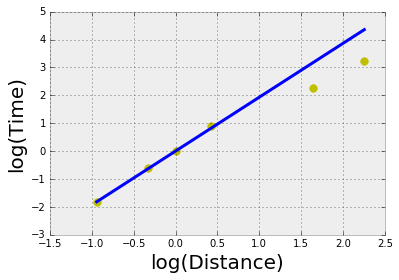

In [100]:
plot_line(1.93, 0.0)

#### Linear Model

In [33]:
from sklearn.linear_model import LinearRegression

- `bias` term is called also `intercept`.
- If the features vary significantly in range, it pays off to `normalize` the data as a preprocessing step.

In [107]:
model = LinearRegression()
model = model.fit(X1.reshape(-1,1),) y1
predictions = model.predict(X1.reshape(-1,1))
print("Model is trained with the following params: {}".format(model.get_params()))

Model is trained with the following params: {'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}


Slope = 1.52334323195, Bias = -0.117734147463
Residual sum of squares: 0.04
Variance score: 0.99


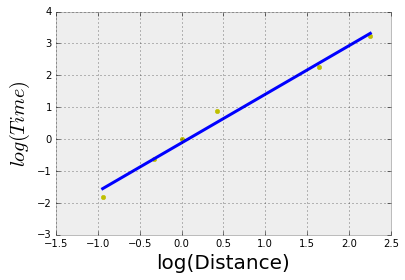

In [34]:
print("Slope = {}, Bias = {}".format(model.coef_[0], model.intercept_))
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((predictions - y1) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X1.reshape(-1,1), y1))

# Plot outputs
plt.scatter(X1, y1,  color='y')
plt.plot(X1, predictions, color='blue', linewidth=3)
plt.xlabel("log(Distance)", fontsize=20); plt.ylabel("$log(Time)$", fontsize=20)
#_ = plt.title("$y\,\,vs\,\,X_2$", fontsize=20)

## Polynomial features
We can synthesize new features by introducing interactions between the current features.
If we are using currently $x_1$ and $x_2$, we can introduce a new feature $x_1x_2$.

Given that our feature set is {$x_1$, $x_2$} using the Preprocessing stage `PolynomialFeatures` will introduce the following features:
- Degree 1: $x_1$, $x_2$
- Degree 2: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1x_2$
- Degree 3: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1x_2$, $x_1^3$, $x_2^3$, $x_1^2x_2$, $x_1x_2^2$

**Notes**:
- Be aware that the number of features in the output array scales polynomially in the number of features of the input array, and exponentially in the degree.
- High degrees can cause overfitting.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [23]:
np.random.seed(0)
n_samples = 20
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X3 = np.sort(np.random.rand(n_samples))
y3 = true_fun(X3) + np.random.randn(n_samples) * 0.15

We can stage two operations, in this case, generating features and training a regressor using the class *Pipeline*. Notice, lines 9 and 10.

In [28]:
def regressor(degree):
  plt.figure(figsize=(6, 4.5))
  ax = plt.subplot(1, 1, 1)
  plt.setp(ax, xticks=(), yticks=())
  degree = int(degree)
  polynomial_features = PolynomialFeatures(degree=degree,
                                           include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  pipeline.fit(X3[:, np.newaxis], y3)

  plt.plot(X3, pipeline.predict(X3[:, np.newaxis]), label="Model")
  plt.plot(X3, true_fun(X3), label="True function")
  plt.scatter(X3, y3, label="Samples")
  plt.xlabel("$x$", fontsize=20); plt.ylabel("$y=cos(1.5\pi x)$", fontsize=20); plt.xlim((0, 1)); plt.ylim((-1.5, 1.5))
  plt.legend(loc="best")
  plt.title("Degree %d" % degree)

**Note:** Increasing model complexity does not imply necessarily producing better models.

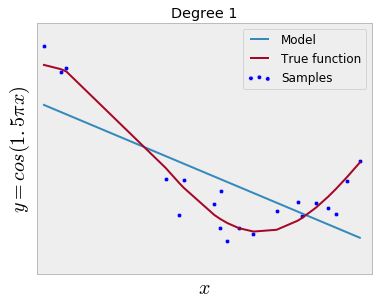

In [29]:
_ = interact(regressor, degree=FloatSlider(min=1, max=60, step=1, value=1))

This example demonstrates the problems of **underfitting** and **overfitting**.
Moreover, we can use linear regression with polynomial features to approximate nonlinear functions.
The models have polynomial features of different degrees.

The plot shows the function that we want to approximate, which is a part of the cosine function ($y=cos(1.5\pi x)$) and the learned function.

We can vary the degree of the polynomial features, to change the model capacity.
We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples.
This is called **underfitting**.
A polynomial of degree 2-7 approximates the true function almost perfectly.
However, for higher degrees (degree 7) the model will **overfit** the training data, i.e. it learns the noise of the training data.